In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import cv2
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout,SeparableConv2D, Activation
import pandas as pd
import os
import random
import shutil 
from seaborn import heatmap

In [45]:
categories=("A", "B", "C", "D", "E", "F")
NUM_OUTPUTS= len(categories)
IMG_SIZE=(224, 224)
input_shape = IMG_SIZE + (3,)

In [12]:
def split_to_train_test(folder):
    
    train_dir = folder+"train"
    test_dir = folder+"test"
    os.mkdir(test_dir)
    os.mkdir(train_dir)
    for name in categories:
        photo_dir = folder+"Apple "+name
        
        photos = os.listdir(photo_dir)
        
        os.mkdir(os.path.join(train_dir, name))
        os.mkdir(os.path.join(test_dir, name))
        
        for idx, photo in enumerate(photos):

            if random.random() < 0.9:
                dest_dir = train_dir
            else:
                dest_dir = test_dir

            src_path = os.path.join(photo_dir, photo)
           
            dest_path = os.path.join(dest_dir, name, photo)
         
            shutil.copy(src_path, dest_path)


In [46]:
def load_random_photo(folder):
    files = os.listdir(folder)
    random_file = random.choice(files)
    
    img = cv2.imread(folder+"/"+random_file)
    img = transform_photo(img)
    class_img=random_file[0]
    return img, class_img

def transform_photo(img):
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    new_img = cv2.resize(new_img, (224, 224))
    return new_img

def show_photo(img, category):
    print("Kategoria zdjęcia: " +category)
    fig = plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()
    

                     


In [47]:
def plot_history(history):
    fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
    # wyświetlamy wykresy
    ax[0][0].plot(history.history["loss"])
    ax[0][1].plot(history.history["accuracy"])
    ax[1][0].plot(history.history["val_loss"])
    ax[1][1].plot(history.history["val_accuracy"])
    #nazywamy zdjęcia
    ax[0][0].set_title("train loss")
    ax[0][1].set_title("train accuracy")
    ax[1][0].set_title("validation loss")
    ax[1][1].set_title("validation accuracy")
    plt.show()

In [48]:
def create_generators(folder, batch_size= 56, n_val = 0.0):
    train_data_dir = os.path.join(folder, 'train')

    test_data_dir = os.path.join(folder, 'test')


    # tworzymy obiekt ImageDataGenerator dla danych treningowych
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split= 0.1)

    # tworzymy obiekt ImageDataGenerator dla danych testowych
    test_datagen =  tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    # generator danych treningowych
    train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(224, 224),
            batch_size=batch_size,
            class_mode='categorical',
            subset ="training", 
            shuffle=True
    )

    val_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(224, 224),
            batch_size=batch_size,
            class_mode='categorical',
            subset ="validation", 
            shuffle=False
    )

    # generator danych testowych
    test_generator = test_datagen.flow_from_directory(
            test_data_dir,
            target_size=(224, 224),
            batch_size=batch_size,
            class_mode='categorical', 
            shuffle=False
    )
    return train_generator, val_generator, test_generator


In [49]:
def create_model():
    shape_img = input_shape
    
    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(filters=32, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Flatten())

    model.add(layers.Dense(224))
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(NUM_OUTPUTS))
    model.add(layers.Activation('softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model

def load_model(name):
    return tf.keras.models.load_model(name)

PROGRAM

In [17]:
split_to_train_test("data/")

In [51]:
BATCH_SIZE = 56
N_VALIDATION = 0.1


In [52]:
train_generator, val_generator, test_generator = create_generators("data", batch_size= BATCH_SIZE, n_val = N_VALIDATION)

Found 4711 images belonging to 6 classes.
Found 521 images belonging to 6 classes.
Found 581 images belonging to 6 classes.


In [14]:
train_generator

Function to split data to usefull folders

In [53]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [9]:
model=load_model('models/my_model.keras')
    

In [54]:
history = model.fit(train_generator,
    epochs=10,
    validation_data=val_generator)

Epoch 1/10
85/85 [==============================] - 150s 2s/step - loss: 0.8549 - accuracy: 0.6795 - val_loss: 1.4385 - val_accuracy: 0.4990
Epoch 2/10
85/85 [==============================] - 163s 2s/step - loss: 0.0962 - accuracy: 0.9665 - val_loss: 0.8384 - val_accuracy: 0.8157
Epoch 3/10
85/85 [==============================] - 167s 2s/step - loss: 0.0302 - accuracy: 0.9911 - val_loss: 1.1792 - val_accuracy: 0.8157
Epoch 4/10
85/85 [==============================] - 169s 2s/step - loss: 0.0261 - accuracy: 0.9924 - val_loss: 0.7370 - val_accuracy: 0.8004
Epoch 5/10
85/85 [==============================] - 168s 2s/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 1.1240 - val_accuracy: 0.8100
Epoch 6/10
85/85 [==============================] - 168s 2s/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.9501 - val_accuracy: 0.8311
Epoch 7/10
85/85 [==============================] - 169s 2s/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 1.3643 - val_accuracy: 0.7908
Epoch 8/10
85

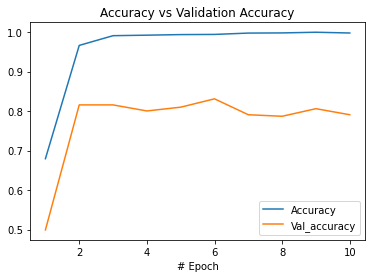

In [55]:
acc = []
val_acc = []
for i in range(len(history.history["accuracy"])):
    acc.append( history.history["accuracy"][i])
    val_acc.append( history.history["val_accuracy"][i])
hist_df = pd.DataFrame({"# Epoch": [e for e in range(1,len(acc)+1)],"Accuracy": acc, "Val_accuracy": val_acc})
hist_df.plot(x = "# Epoch", y = ["Accuracy","Val_accuracy"])
plt.title("Accuracy vs Validation Accuracy")
plt.show()

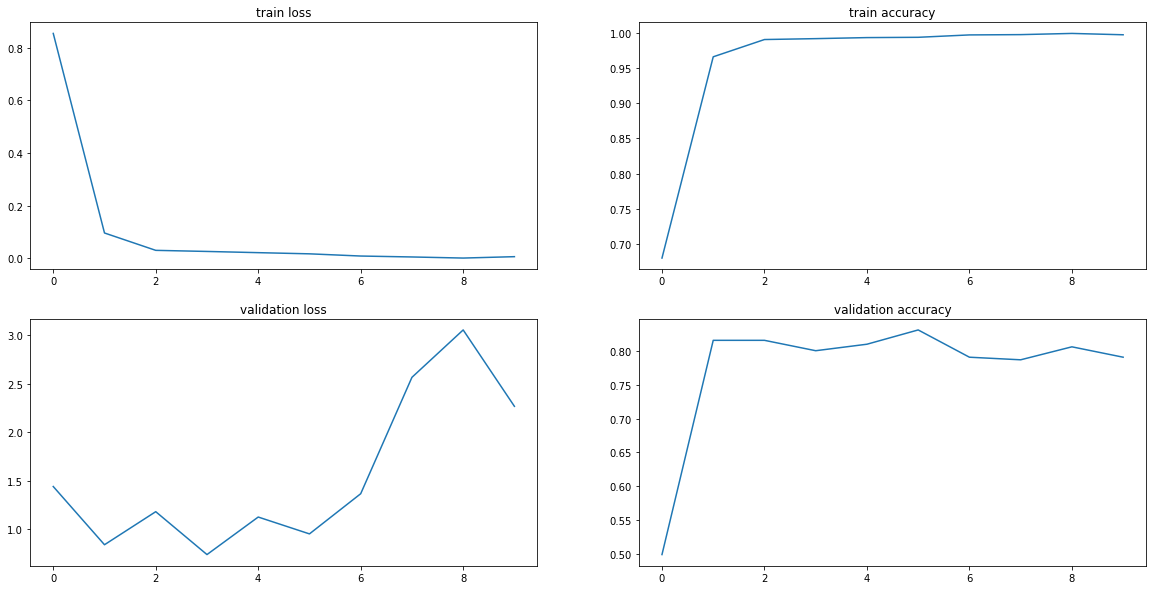

In [56]:
plot_history(history)

In [57]:
def get_y_pred(model, test_generator):  
    
    predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
    return np.argmax(predictions, axis=1)

In [58]:
y_pred= get_y_pred(model, test_generator)
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=categories))


C:\Users\Paulina\AppData\Local\Temp\ipykernel_2804\1673630469.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


11/11 [==============================] - 6s 504ms/step
              precision    recall  f1-score   support

           A       0.97      1.00      0.99        33
           B       0.91      1.00      0.95        68
           C       1.00      0.94      0.97       114
           D       1.00      1.00      1.00       109
           E       1.00      0.98      0.99        63
           F       1.00      1.00      1.00       194

    accuracy                           0.99       581
   macro avg       0.98      0.99      0.98       581
weighted avg       0.99      0.99      0.99       581



Text(33.0, 0.5, 'True labels')

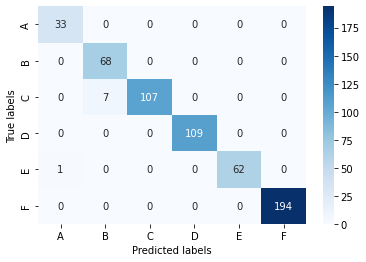

In [59]:
cm = confusion_matrix(y_true, y_pred)

ax = heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [272]:
model.save("models/apple_classifier.h5")



C:\Users\arkad\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [273]:
model.save('models/my_model.keras')

In [22]:
input_shape

(224, 224, 3)

In [60]:
inputLayer = tf.keras.Input(shape=(input_shape))
# bierzemy wytrenowany wcześniej model
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights='imagenet',  # wczytaj z nauczonymi wagami
    input_shape=input_shape,
    include_top=False)   # nie dołączaj ostatniej warstwy k\

# nie chcemy aby nauczony już feature extractor się uczył
base_model.trainable = False\

# dodajemy ostatnie warstwy klasyfikatora
x = base_model(inputLayer, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(6, activation="softmax")(x)

# zamykamy w kerasowy model
model_2 = tf.keras.Model(inputLayer, output)
model_2.summary()

# kompilujemy całość
model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_10  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_13 (Dropout)        (None, 1280)              0         
                                                                 
 dense_16 (Dense)            (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-traina

In [61]:
history2 = model_2.fit(train_generator,
    epochs=10,
    validation_data=val_generator)

Epoch 1/10
85/85 [==============================] - 72s 818ms/step - loss: 0.5145 - accuracy: 0.8336 - val_loss: 0.2458 - val_accuracy: 0.9155
Epoch 2/10
85/85 [==============================] - 75s 886ms/step - loss: 0.1097 - accuracy: 0.9813 - val_loss: 0.1826 - val_accuracy: 0.9367
Epoch 3/10
85/85 [==============================] - 80s 940ms/step - loss: 0.0615 - accuracy: 0.9919 - val_loss: 0.1753 - val_accuracy: 0.9347
Epoch 4/10
85/85 [==============================] - 83s 981ms/step - loss: 0.0443 - accuracy: 0.9949 - val_loss: 0.1698 - val_accuracy: 0.9328
Epoch 5/10
85/85 [==============================] - 84s 988ms/step - loss: 0.0339 - accuracy: 0.9955 - val_loss: 0.1468 - val_accuracy: 0.9405
Epoch 6/10
85/85 [==============================] - 87s 1s/step - loss: 0.0267 - accuracy: 0.9966 - val_loss: 0.1417 - val_accuracy: 0.9482
Epoch 7/10
85/85 [==============================] - 85s 998ms/step - loss: 0.0234 - accuracy: 0.9966 - val_loss: 0.1443 - val_accuracy: 0.9443
Ep

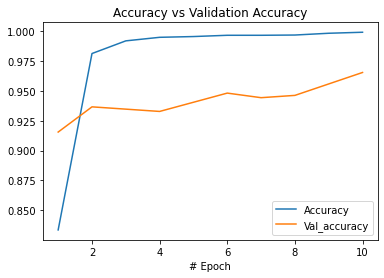

In [66]:
acc = []
val_acc = []
for i in range(len(history2.history["accuracy"])):
    acc.append( history2.history["accuracy"][i])
    val_acc.append( history2.history["val_accuracy"][i])
hist_df = pd.DataFrame({"# Epoch": [e for e in range(1,len(acc)+1)],"Accuracy": acc, "Val_accuracy": val_acc})
hist_df.plot(x = "# Epoch", y = ["Accuracy","Val_accuracy"])
plt.title("Accuracy vs Validation Accuracy")
plt.show()

In [62]:
y_pred= get_y_pred(model_2, test_generator)
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=categories))

C:\Users\Paulina\AppData\Local\Temp\ipykernel_2804\1673630469.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


11/11 [==============================] - 8s 677ms/step
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        33
           B       1.00      1.00      1.00        68
           C       1.00      1.00      1.00       114
           D       0.99      0.98      0.99       109
           E       1.00      0.98      0.99        63
           F       0.99      1.00      0.99       194

    accuracy                           0.99       581
   macro avg       1.00      0.99      1.00       581
weighted avg       0.99      0.99      0.99       581



Text(33.0, 0.5, 'True labels')

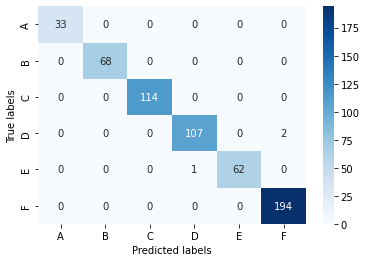

In [63]:
cm = confusion_matrix(y_true, y_pred)

ax = heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')